## Number of Books written by each Author

In [66]:
!pip install vaderSentiment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

Defaulting to user installation because normal site-packages is not writeable


In [67]:
df = pd.read_csv('../Datasets/cleaned_data/cleaned_data.csv')

# Step 2: Define labels for top 10 genres
labels = [
    'Fiction', 'Juvenile Fiction', 'Biography & Autobiography', 'Religion',
    'History', 'Business & Economics', 'Computers', 'Cooking',
    'Social Science', 'Family & Relationships'
]

data = df.sample(5000)

In [68]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [69]:
data.head(2)

,Title,review/score,review/text,authors,categories,ratingsCount
673,QBQ! The Question Behind the Question: Practic...,5.0,I bought this book based on a friends recommen...,John G. Miller,Business & Economics,8.0
1515,Stone of Farewell,4.0,Stone of Farewell by Tad Williams is the secon...,Tad Williams,Fiction,18.0


In [70]:
# Lower casing the reviews
data['clean_reviews'] = data['review/text'].str.lower()
# Calculating Polarity score of reviews
data['score'] = data['clean_reviews'].apply(lambda review: vader.polarity_scores(review))
# Extracting compound column
data['compound']  = data['score'].apply(lambda score_dict: score_dict['compound'])

In [71]:
# if compound value is more than 0.05 then it precive as positive
# if compound value is less than -0.0 then it precive as negative
# if compound value is equal to 0.0 then it precive as neutral

data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,clean_reviews,score,compound,Sentiment
673,QBQ! The Question Behind the Question: Practic...,5.0,I bought this book based on a friends recommen...,John G. Miller,Business & Economics,8.0,i bought this book based on a friends recommen...,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...",0.7710,positive
1515,Stone of Farewell,4.0,Stone of Farewell by Tad Williams is the secon...,Tad Williams,Fiction,18.0,stone of farewell by tad williams is the secon...,"{'neg': 0.041, 'neu': 0.88, 'pos': 0.079, 'com...",0.9208,positive
12325,The Snow Garden,1.0,I was very disappointed by this book. As an as...,Christopher Rice,Fiction,12.0,i was very disappointed by this book. as an as...,"{'neg': 0.093, 'neu': 0.835, 'pos': 0.072, 'co...",-0.4208,negative
14080,The Novice's Tale (Sister Frevisse Medieval My...,5.0,TO THE PRIORY A LADY CAME FOR MISCHIEF... AND ...,Margaret Frazer,Detective and mystery stories,7.0,to the priory a lady came for mischief... and ...,"{'neg': 0.165, 'neu': 0.728, 'pos': 0.108, 'co...",-0.8903,negative
11481,Kane and Abel,5.0,I would rate Kane and Abel 10 out of 10. It is...,Jeffrey Archer,Fiction,65.0,i would rate kane and abel 10 out of 10. it is...,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.5859,positive


## Distribution of Negative, Neutral and Positive Sentiment in whole corpus

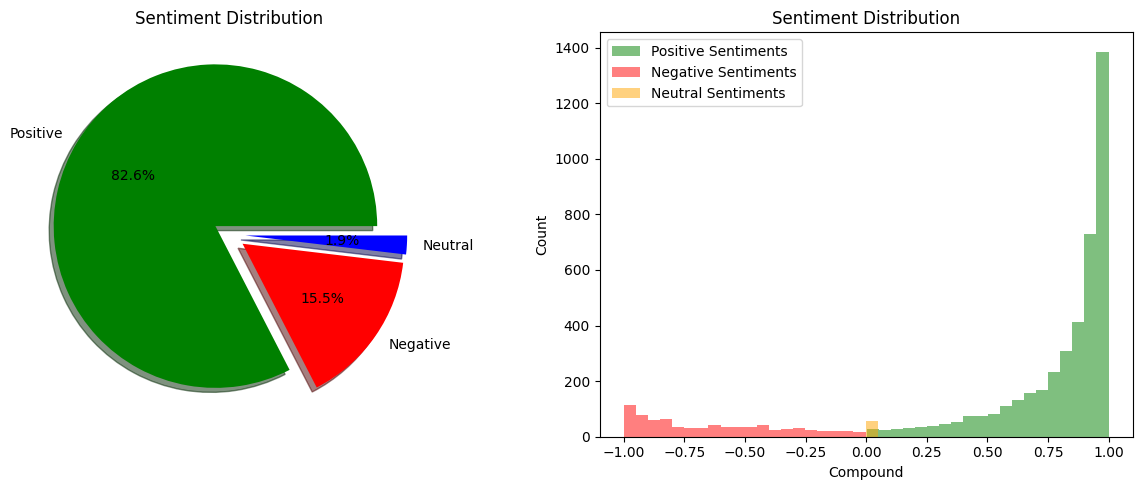

In [72]:
import matplotlib.pyplot as plt

# Create a figure and subplots with 1 row and 2 columns
plt.figure(figsize=(12, 5))

# Plot 1 - Pie chart for sentiment distribution
plt.subplot(1, 2, 1)
labels = ['Positive', 'Negative', 'Neutral']
sizes = data['Sentiment'].value_counts()
colors = ['green', 'red', 'blue']
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')

# Plot 2 - Histogram for sentiment distribution
plt.subplot(1, 2, 2)
positive = data[data['compound'] > 0]['compound']
negative = data[data['compound'] < 0]['compound']
neutral = data[data['compound'] == 0]['compound']

sentiments = [positive, negative, neutral]
colors = ['green', 'red', 'orange']
labels = ['Positive Sentiments', 'Negative Sentiments', 'Neutral Sentiments']

for sentiment, color, label in zip(sentiments, colors, labels):
    plt.hist(sentiment, bins=20, color=color, alpha=0.5, label=label)

plt.title('Sentiment Distribution')
plt.xlabel('Compound')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()


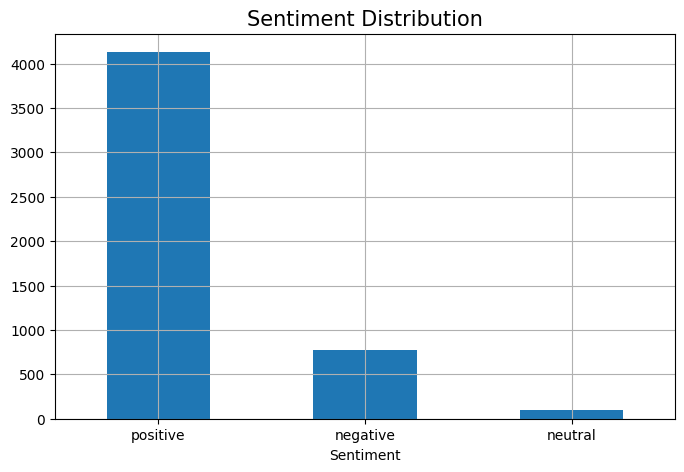

In [73]:
data['Sentiment'].value_counts().plot(kind = 'bar', figsize = (8,5))
plt.xticks(rotation = 'horizontal')
plt.title('Sentiment Distribution',fontsize = 15)
plt.grid()
plt.show()

## Most number of **Positive** Reviews on the Books

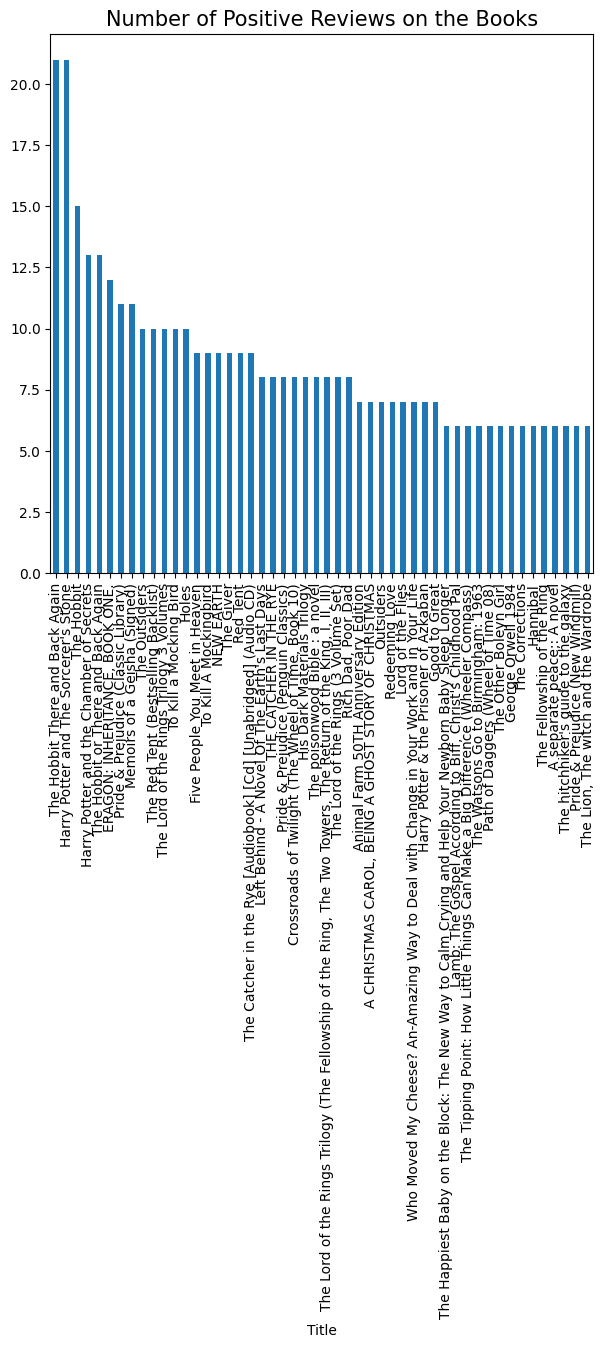

In [74]:
data[data['Sentiment'] == 'positive']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Positive Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Most number of **Neutral** Reviews on the Books

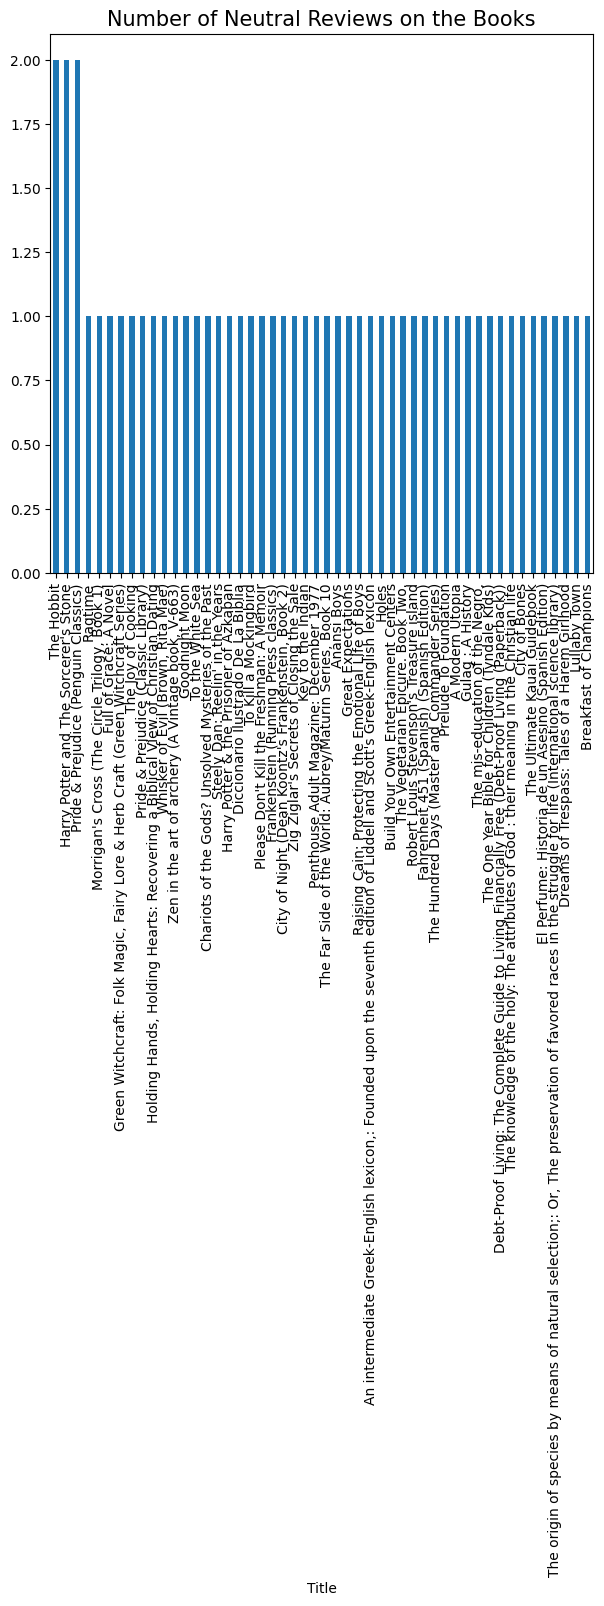

In [75]:
data[data['Sentiment'] == 'neutral']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Neutral Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Most number of **Negative** Reviews on the Books

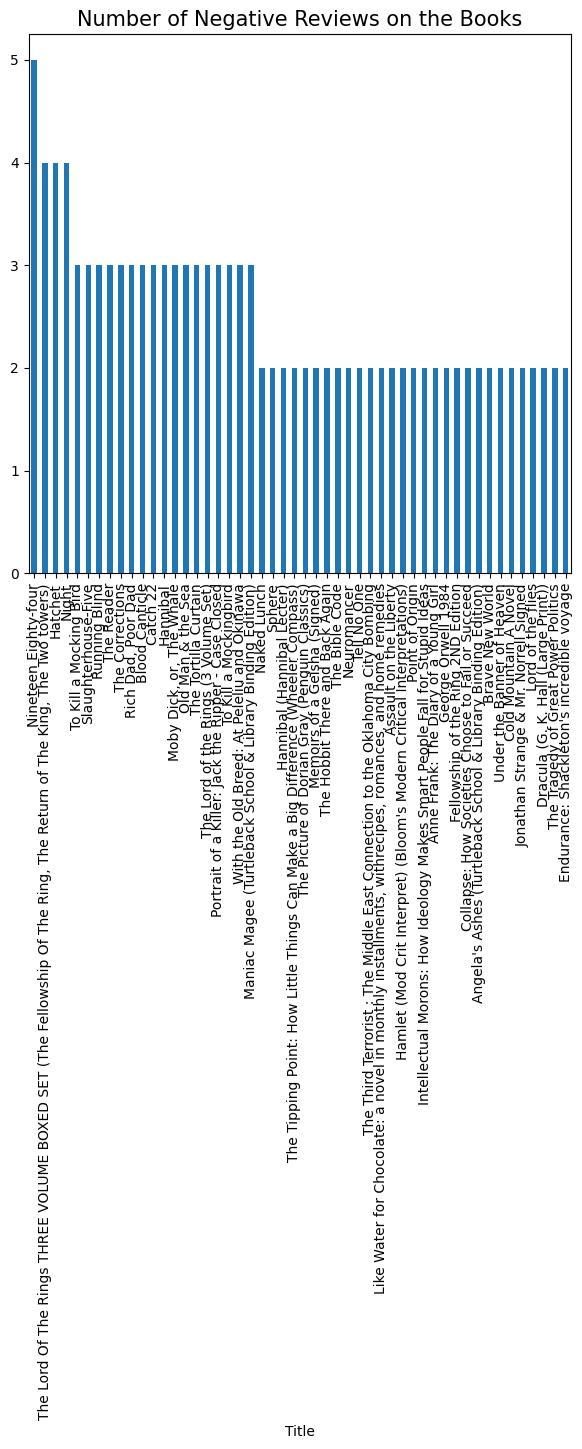

In [76]:
data[data['Sentiment'] == 'negative']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Negative Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Dataframe of Reviews vs Sentiments

In [77]:
reviews_df = data[['clean_reviews', 'Sentiment']]

In [78]:
reviews_df.head()

,clean_reviews,Sentiment
673,i bought this book based on a friends recommen...,positive
1515,stone of farewell by tad williams is the secon...,positive
12325,i was very disappointed by this book. as an as...,negative
14080,to the priory a lady came for mischief... and ...,negative
11481,i would rate kane and abel 10 out of 10. it is...,positive


## Dividing Data into x & y 

In [79]:
x = reviews_df.drop(['Sentiment'], axis=1)
y = reviews_df['Sentiment']

In [80]:
x.shape

(5000, 1)

In [81]:
y.shape

(5000,)

# **text - preprocessing**

In [82]:
!pip install nltk
import numpy as np # basic Libraries
import pandas as pd
import seaborn as sns
import nltk

Defaulting to user installation because normal site-packages is not writeable


In [83]:
!pip install -U nltk

Defaulting to user installation because normal site-packages is not writeable


In [84]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nagaraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nagaraj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nagaraj\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [85]:
import re # regular expression module
stemmer = nltk.SnowballStemmer("english") # for stemming
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english')) # for stopword

In [86]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re, string, unicodedata
from string import punctuation

In [87]:
def hapus_url(text):
    return re.sub(r'http\S+','', text)

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

def lemmi(text):
    lemmatizer = WordNetLemmatizer()
    text=' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

def final_clean(text):
    final_text= []
    for i in text.split():
        if i.strip().lower() not in stopword and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

In [88]:
def clean(text):
    text = hapus_url(text)
    text = remove_special_characters(text, remove_digits=True)
    text = lemmi(text)
    text = final_clean(text)
    return text

In [89]:
import nltk
import os

# Set the custom download directory
nltk_data_dir = '/kaggle/working/nltk_data'

# Add the path to NLTK's data path list
nltk.data.path.append(nltk_data_dir)

# Download 'wordnet' if not already downloaded
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet', download_dir=nltk_data_dir)

# (Optional) Also download the wordnet IC file if using similarity measures
# nltk.download('wordnet_ic', download_dir=nltk_data_dir)

# Now import and use wordnet
from nltk.corpus import wordnet

# Example usage
syns = wordnet.synsets("good")
print(syns[0].definition())


benefit


[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [90]:
x["clean_reviews"] = x["clean_reviews"].apply(clean)

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

In [92]:
x_train

,clean_reviews
11484,book ha meriwether lewis focus ambrose show at...
11586,kip russell life average small town america sl...
3969,found attempt integration new age idea hard sc...
11137,book binding extremely poor original replaceme...
11604,reading irish lady one sitting sat read beauti...
...,...
12145,wa marvelous book colleague lent couldnt put f...
798,book great found best golfer high school team ...
9272,friend died cancer month ago im executor among...
1045,hasnt oprah featured frank mccourts quotangela...


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
tfidf_vectorizer = TfidfVectorizer()  # You can adjust the max_features parameter

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train['clean_reviews'])

# Transform the 'clean_reviews' column on the testing data
x_test_tfidf = tfidf_vectorizer.transform(x_test['clean_reviews'])

In [95]:
x_train_tfidf_df = pd.DataFrame(x_train_tfidf.toarray())
x_test_tfidf_df =  pd.DataFrame(x_test_tfidf.toarray())

## Balancing Data
### Using Smote for Balancing Data

In [96]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_bal, y_train_bal = oversample.fit_resample(x_train_tfidf, y_train)
y_train_bal.value_counts()

Defaulting to user installation because normal site-packages is not writeable


Sentiment
negative    3104
positive    3104
neutral     3104
Name: count, dtype: int64

In [97]:
x_test_bal, y_test_bal = oversample.fit_resample(x_test_tfidf, y_test)
y_test_bal.value_counts()

Sentiment
negative    1025
positive    1025
neutral     1025
Name: count, dtype: int64

## **Model Training**

## 1) Logistic Regression
### Applying Logistic Regression on Imbalanced Data

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [99]:
log = LogisticRegression()
log.fit(x_train_tfidf_df, y_train)

LogisticRegression()

In [100]:
perd_log=log.predict(x_test_tfidf_df)

In [101]:
print(classification_report(perd_log, y_test))

              precision    recall  f1-score   support

    negative       0.05      1.00      0.10        10
     neutral       0.00      0.00      0.00         0
    positive       1.00      0.83      0.91      1240

    accuracy                           0.83      1250
   macro avg       0.35      0.61      0.33      1250
weighted avg       0.99      0.83      0.90      1250



C:\Users\nagaraj\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nagaraj\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nagaraj\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Applying Logistic Regression on Balanced Data

In [102]:
log_bal = LogisticRegression()
log_bal.fit(x_train_bal, y_train_bal)

LogisticRegression()

In [103]:
perd_log_bal =log_bal.predict(x_test_bal)

In [104]:
print(classification_report(perd_log_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.53      0.66      0.59       832
     neutral       0.01      1.00      0.01         7
    positive       0.94      0.43      0.59      2236

    accuracy                           0.49      3075
   macro avg       0.49      0.69      0.40      3075
weighted avg       0.82      0.49      0.59      3075



In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

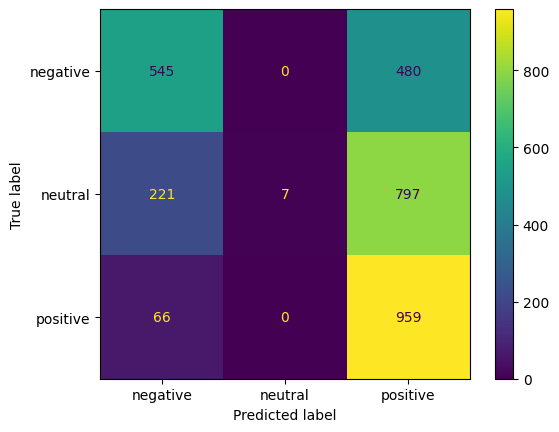

In [106]:
cm = confusion_matrix(y_test_bal, perd_log_bal, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()

## 2) Decision Tree
### Decision tree on imbalanced Data

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=45)
classifier.fit(x_train_tfidf_df, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=45)

In [109]:
pred_tre = classifier.predict(x_test_tfidf_df)

In [110]:
print(classification_report(pred_tre, y_test))

              precision    recall  f1-score   support

    negative       0.28      0.34      0.31       167
     neutral       0.00      0.00      0.00        18
    positive       0.88      0.85      0.87      1065

    accuracy                           0.77      1250
   macro avg       0.39      0.40      0.39      1250
weighted avg       0.79      0.77      0.78      1250



In [111]:
confusion_matrix(y_test,pred_tre)

array([[ 56,   4, 137],
       [  6,   0,  22],
       [105,  14, 906]], dtype=int64)

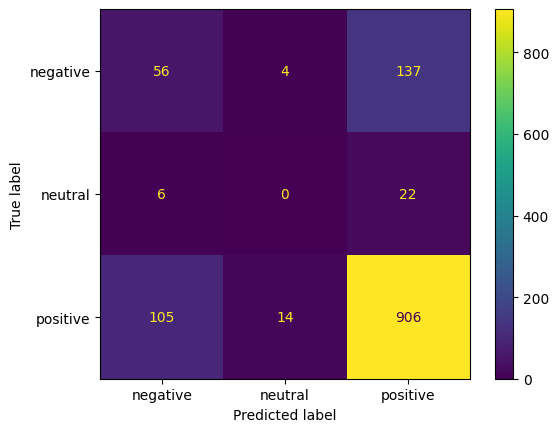

In [112]:
cm = confusion_matrix(y_test, pred_tre, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

### Decision tree on balanced data

In [113]:
classifier_bal= DecisionTreeClassifier(criterion='entropy', random_state=45)
classifier_bal.fit(x_train_bal, y_train_bal)

DecisionTreeClassifier(criterion='entropy', random_state=45)

In [114]:
pred_tre_bal = classifier_bal.predict(x_test_bal)

In [115]:
print(classification_report(pred_tre_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.48      0.52      0.49       945
     neutral       0.04      0.68      0.08        68
    positive       0.81      0.40      0.54      2062

    accuracy                           0.44      3075
   macro avg       0.44      0.53      0.37      3075
weighted avg       0.69      0.44      0.52      3075



In [116]:
confusion_matrix(y_test_bal,pred_tre_bal)

array([[487,   6, 532],
       [283,  46, 696],
       [175,  16, 834]], dtype=int64)

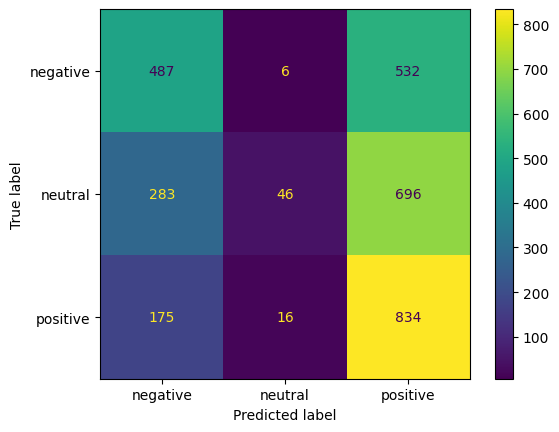

In [117]:
cm = confusion_matrix(y_test_bal, pred_tre_bal, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

## 3) Naive Bayes
### Naive bayes on imbalanced Data

In [118]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [119]:
nb.fit(x_train_tfidf_df, y_train)

GaussianNB()

In [120]:
pred_nb = nb.predict(x_test_tfidf_df)

In [121]:
print(classification_report(pred_nb, y_test))

              precision    recall  f1-score   support

    negative       0.21      0.16      0.18       262
     neutral       0.04      0.25      0.06         4
    positive       0.80      0.83      0.82       984

    accuracy                           0.69      1250
   macro avg       0.35      0.41      0.35      1250
weighted avg       0.67      0.69      0.68      1250



In [122]:
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import gen_batches

batch_size = 1000
gnb = GaussianNB()

for batch in gen_batches(x_train_bal.shape[0], batch_size):
    x_batch = x_train_bal[batch].toarray()  # still risky
    y_batch = y_train_bal[batch]
    gnb.partial_fit(x_batch, y_batch, classes=np.unique(y_train_bal))


In [123]:
pred_nb_bal = gnb.predict(x_test_bal.toarray())

In [124]:
print(classification_report(pred_nb_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.14      0.17      0.15       831
     neutral       0.03      0.89      0.06        38
    positive       0.80      0.37      0.51      2206

    accuracy                           0.32      3075
   macro avg       0.32      0.48      0.24      3075
weighted avg       0.61      0.32      0.41      3075



### Naive Bayes on Balanced Data

In [125]:
import numpy as np

# Assuming x_train_bal is your sparse matrix
x_train_bal_dense = x_train_bal.toarray()

# Then proceed with fitting the model using the dense array
nb_bal = GaussianNB()
nb_bal.fit(x_train_bal_dense, y_train_bal)

GaussianNB()

In [126]:
pred_nb_bal = nb_bal.predict(x_test_bal.toarray())

In [127]:
print(classification_report(pred_nb_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.13      0.16      0.14       818
     neutral       0.03      0.90      0.05        29
    positive       0.80      0.37      0.50      2228

    accuracy                           0.32      3075
   macro avg       0.32      0.47      0.23      3075
weighted avg       0.61      0.32      0.40      3075



## 4) RandomForest 


In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
x_train_tfidf_df.shape

(3750, 32470)

In [130]:
x_test_tfidf_df.shape

(1250, 32470)

In [131]:
ran=RandomForestClassifier(n_estimators=100)
ran.fit(x_train_tfidf_df,y_train)

RandomForestClassifier()

In [132]:
perd_ran=ran.predict(x_test_tfidf_df)

In [133]:
confusion_matrix(y_test,perd_ran)

array([[   9,    0,  188],
       [   0,    0,   28],
       [   1,    0, 1024]], dtype=int64)

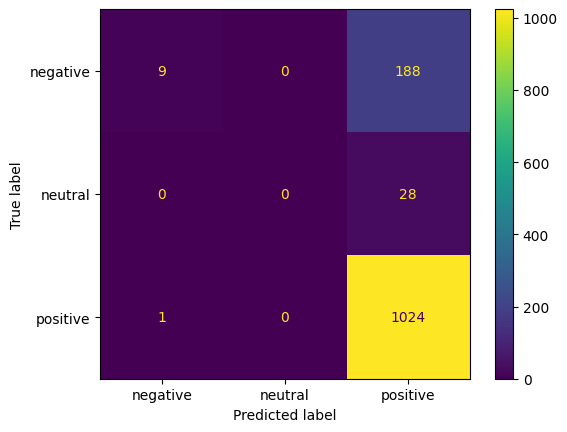

In [134]:
cm = confusion_matrix(y_test, perd_ran, labels=ran.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ran.classes_)
disp.plot()

In [135]:
y_test.shape , perd_ran.shape

((1250,), (1250,))

In [136]:
print(classification_report(perd_ran, y_test))

              precision    recall  f1-score   support

    negative       0.05      0.90      0.09        10
     neutral       0.00      0.00      0.00         0
    positive       1.00      0.83      0.90      1240

    accuracy                           0.83      1250
   macro avg       0.35      0.58      0.33      1250
weighted avg       0.99      0.83      0.90      1250



C:\Users\nagaraj\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nagaraj\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nagaraj\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### RandomForest on balanced Data

In [137]:
ran_bal=RandomForestClassifier(n_estimators=100)
ran_bal.fit(x_train_bal,y_train_bal)
perd_ran_bal=ran_bal.predict(x_test_bal)

In [138]:
confusion_matrix(y_test_bal,perd_ran_bal)

array([[ 336,    0,  689],
       [  19,    0, 1006],
       [  30,    0,  995]], dtype=int64)

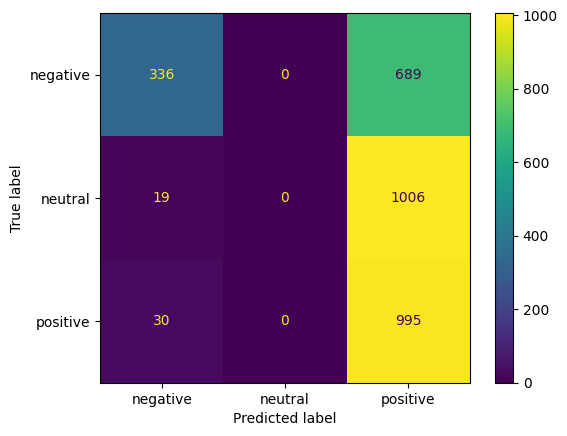

In [139]:
cm = confusion_matrix(y_test_bal, perd_ran_bal, labels=ran.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ran.classes_)
disp.plot()

In [140]:
print(classification_report(perd_ran_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.33      0.87      0.48       385
     neutral       0.00      0.00      0.00         0
    positive       0.97      0.37      0.54      2690

    accuracy                           0.43      3075
   macro avg       0.43      0.41      0.34      3075
weighted avg       0.89      0.43      0.53      3075



C:\Users\nagaraj\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nagaraj\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nagaraj\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [141]:
import pickle

In [142]:
pickle.dump(log_bal, open('log_bal.pkl','wb'))

In [143]:
with open('log_bal','wb') as f:
  pickle.dump(log_bal,f)

In [144]:
with open('log_bal','rb') as f:
  mp=pickle.load(f)

In [145]:
def predict(text):
  input_text = [text]
  text_to_vec = tfidf_vectorizer.transform(input_text).toarray() 
  prediction = mp.predict(text_to_vec)
  return prediction

In [146]:
User_input = input("Enter your text:")
output = predict(User_input)
print(output)

['positive']
